# Baseline Experiment 2: Training Random Forest Classifier

Using Grid Search with 5-fold Cross-Validation, with a 70/30 train/test split.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import sklearn
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix 

# For reproducible results
RANDOM_STATE_SEED = 420

In [2]:
df_dataset = pd.read_csv("processed_friday_dataset.csv")

In [3]:
df_dataset

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
0,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,0
1,281,2,1,38,0.0,38,0,19.000000,26.870058,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,0
2,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,0
3,132,2,0,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,0
4,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364426,25,1,1,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,1
1364427,37,1,1,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,1
1364428,112640543,3,0,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,56300000.0,7.778175,56300000.0,56300000.0,0,0,0
1364429,41,1,1,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,1


In [4]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364431 entries, 0 to 1364430
Data columns (total 73 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Flow Duration      1364431 non-null  int64  
 1   Tot Fwd Pkts       1364431 non-null  int64  
 2   Tot Bwd Pkts       1364431 non-null  int64  
 3   TotLen Fwd Pkts    1364431 non-null  int64  
 4   TotLen Bwd Pkts    1364431 non-null  float64
 5   Fwd Pkt Len Max    1364431 non-null  int64  
 6   Fwd Pkt Len Min    1364431 non-null  int64  
 7   Fwd Pkt Len Mean   1364431 non-null  float64
 8   Fwd Pkt Len Std    1364431 non-null  float64
 9   Bwd Pkt Len Max    1364431 non-null  int64  
 10  Bwd Pkt Len Min    1364431 non-null  int64  
 11  Bwd Pkt Len Mean   1364431 non-null  float64
 12  Bwd Pkt Len Std    1364431 non-null  float64
 13  Flow IAT Mean      1364431 non-null  float64
 14  Flow IAT Std       1364431 non-null  float64
 15  Flow IAT Max       1364431 non-n

### 1- Making an 70/30 train/test split

In [5]:
train, test = train_test_split(df_dataset, test_size=0.3, random_state=RANDOM_STATE_SEED)

In [6]:
train

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
358501,1932,1,1,34,211.0,34,34,34.000000,0.000000,211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
205523,10230,3,4,326,129.0,326,0,108.666667,188.216188,112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
334013,29643,1,1,32,121.0,32,32,32.000000,0.000000,121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1244653,94265,3,0,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
1309914,60062,3,0,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049785,4611411,4,5,935,374.0,935,0,233.750000,467.500000,374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
178094,11867,3,4,326,129.0,326,0,108.666667,188.216188,112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
510579,541109,6,5,455,338.0,140,0,75.833333,62.936211,145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1242184,3404233,5,3,935,322.0,935,0,187.000000,418.144712,322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


In [7]:
test

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
421031,5856314,4,4,97,231.0,97,0,24.25,48.500000,231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1026751,4442833,5,3,935,348.0,935,0,187.00,418.144712,348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
882513,67116,3,0,0,0.0,0,0,0.00,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
413896,2681,1,1,34,155.0,34,34,34.00,0.000000,155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
189064,1391793,8,7,1132,1581.0,661,0,141.50,222.792023,1173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341771,4975198,2,0,0,0.0,0,0,0.00,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1281286,4383470,5,4,935,668.0,935,0,187.00,418.144712,334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
606144,15125,2,1,0,0.0,0,0,0.00,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
188978,1685281,8,7,1144,1581.0,677,0,143.00,227.969923,1173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


### 2- Checking label distribution

In [8]:
print("Full dataset:\n")
print("Benign: " + str(df_dataset["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(df_dataset["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Training set:\n")
print("Benign: " + str(train["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(train["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Test set:\n")
print("Benign: " + str(test["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(test["Label"].value_counts()[[1]].sum()))

Full dataset:

Benign: 1074342
Malicious: 290089
---------------
Training set:

Benign: 751849
Malicious: 203252
---------------
Test set:

Benign: 322493
Malicious: 86837


### 3- Splitting to X_train, y_train, X_test, y_test

In [9]:
y_train = np.array(train.pop("Label")) # pop removes "Label" from the dataframe
X_train = train.values

print(type(X_train))
print(type(y_train))
print(X_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(955101, 72)
(955101,)


In [10]:
y_test = np.array(test.pop("Label")) # pop removes "Label" from the dataframe
X_test = test.values

print(type(X_test))
print(type(y_test))
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(409330, 72)
(409330,)


### 4- Fitting Random Forest model

In [11]:
model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None
)

hyperparameters = {
    'n_estimators': [50, 75, 100, 125, 150]
}

In [12]:
clf = GridSearchCV(
    estimator=model,
    param_grid=hyperparameters,
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

In [13]:
clf.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [50, 75, 100, 125, 150]}, verbose=1)

### 5- Extracting best performing model in the 5-fold cross-validation Grid Search

In [14]:
print("Accuracy score on Validation set: \n")
print(clf.best_score_ )
print("---------------")
print("Best performing hyperparameters on Validation set: ")
print(clf.best_params_)
print("---------------")
print(clf.best_estimator_)

Accuracy score on Validation set: 

0.9995874782114358
---------------
Best performing hyperparameters on Validation set: 
{'n_estimators': 125}
---------------
RandomForestClassifier(n_estimators=125)


In [15]:
model = clf.best_estimator_

In [16]:
model

RandomForestClassifier(n_estimators=125)

### 6- Evaluating on Test set

In [17]:
predictions = model.predict(X_test)

In [18]:
predictions

array([0, 0, 1, ..., 0, 0, 0])

#### 6.1 Accuracy on Test set

In [19]:
print(accuracy_score(y_test, predictions))

0.9995920162216305


#### 6.2 Confusion matrix

In [20]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[322417     76]
 [    91  86746]]


/home/tamer/anaconda3/envs/cic-ids-2018/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


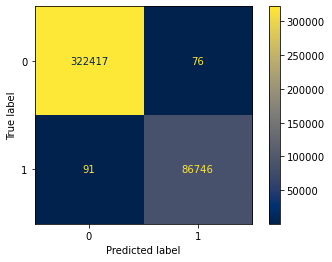

In [21]:
plot_confusion_matrix(model, X_test, y_test, cmap="cividis")

#### 6.3 Classification report

In [22]:
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           0    0.99972   0.99976   0.99974    322493
           1    0.99912   0.99895   0.99904     86837

    accuracy                        0.99959    409330
   macro avg    0.99942   0.99936   0.99939    409330
weighted avg    0.99959   0.99959   0.99959    409330



### 7- Saving model

In [23]:
joblib.dump(model, "trained_models/random-forest-classifier.pkl")

['trained_models/random-forest-classifier.pkl']

### 8- Testing loading model

In [24]:
model = joblib.load("trained_models/random-forest-classifier.pkl")

In [25]:
model

RandomForestClassifier(n_estimators=125)